In [1]:
#Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [2]:
#Read CSV file
rev_data = pd.read_csv("Box Office Revenue.csv")
rev_data["Worldwide Box Office"] = rev_data["Worldwide Box Office"].fillna(0)
rev_data["Domestic Box Office"] = rev_data["Domestic Box Office"].fillna(0)
rev_data["International Box Office"] = rev_data["International Box Office"].fillna(0)
rev_data["Year"] = rev_data["Year"].astype(int)
rev_data.head(5).style.format({"Rank Release":"{:d}",
                          "Year":"{:d}",
                          "Worldwide Box Office":"${:,.2f}",
                          "Domestic Box Office":"${:,.2f}",
                          "International Box Office":"${:,.2f}"})

In [3]:
#Create columns to provide the Worldwide, International and Domestic yearly total revenue
rev_data["Worldwide Yearly Total"] = rev_data.groupby(["Year"])["Worldwide Box Office"].transform('sum')
rev_data["Domestic Yearly Total"] = rev_data.groupby(["Year"])["Domestic Box Office"].transform('sum')
rev_data["International Yearly Total"] = rev_data.groupby(["Year"])["International Box Office"].transform('sum')
rev_data

Rank Release  Year                            Movie  \
0               1  1937  Snow White and the Seven Dwarfs   
1               2  1940                        Pinocchio   
2               3  1940                         Fantasia   
3               4  1946                Song of the South   
4               5  1950                       Cinderella   
..            ...   ...                              ...   
601           602  2019                          Aladdin   
602           603  2019     Maleficent: Mistress of Evil   
603           604  2019                            Dumbo   
604           605  2019                         Penguins   
605           606  2020                           Onward   

     Worldwide Box Office  Domestic Box Office  International Box Office  \
0               184925486          184925486.0                       0.0   
1                84300000           84300000.0                       0.0   
2                83320000           83320000.0                       0.0   
3                65000000           65000000.0                       0.0   
4               263591415           85000000.0               178591415.0   
..                    ...                  ...                       ...   
601            1050959216          355559216.0               695400000.0   
602             489347098          113929605.0               375417493.0   
603             353166307          114766307.0               238400000.0   
604               7699452            7699452.0                       0.0   
605             102954352           61555145.0                41399207.0   

     Worldwide Yearly Total  Domestic Yearly Total  International Yearly Total  
0                 184925486           1.849255e+08                0.000000e+00  
1                 167620000           1.676200e+08                0.000000e+00  
2                 167620000           1.676200e+08                0.000000e+00  
3                  65000000           6.500000e+07                0.000000e+00  
4                 263591415           8.500000e+07                1.785914e+08  
..                      ...                    ...                         ...  
601             11080077480           3.847410e+09                7.232668e+09  
602             11080077480           3.847410e+09                7.232668e+09  
603             11080077480           3.847410e+09                7.232668e+09  
604             11080077480           3.847410e+09                7.232668e+09  
605               102954352           6.155514e+07                4.139921e+07  

[606 rows x 9 columns]

Data.groupby(['Year']['Money']).sum()

In [5]:
#Read in the Disney historical stock price
price_data = pd.read_csv("DisneyHistoricalStockPriceDataEOY.csv")
price_data["Date"] = price_data["Date"].str.slice(-4)
price_data = price_data.rename(columns={"Date":"Year"})
price_data["Year"] = price_data["Year"].astype(int)
price_data = price_data.drop(['Open','High','Low','Volume'],axis=1)
price_data.head(5)

Year  Close
0  1972   2.16
1  1973   0.88
2  1974   0.41
3  1975   0.97
4  1976   0.95

In [6]:
#Create column to provde the close price for final trading day of each year.
data = pd.merge(rev_data,price_data,on="Year")
data

Rank Release  Year                         Movie  Worldwide Box Office  \
0              20  1973                    Robin Hood              32056467   
1              21  1975       The Apple Dumpling Gang              31916500   
2              22  1977                  The Rescuers              48775599   
3              23  1977                 Pete’s Dragon              36000000   
4              24  1977    Herbie Goes to Monte Carlo              28000000   
..            ...   ...                           ...                   ...   
582           602  2019                       Aladdin            1050959216   
583           603  2019  Maleficent: Mistress of Evil             489347098   
584           604  2019                         Dumbo             353166307   
585           605  2019                      Penguins               7699452   
586           606  2020                        Onward             102954352   

     Domestic Box Office  International Box Office  Worldwide Yearly Total  \
0             32056467.0                       0.0                32056467   
1             31916500.0                       0.0                31916500   
2             48775599.0                       0.0               138717599   
3             36000000.0                       0.0               138717599   
4             28000000.0                       0.0               138717599   
..                   ...                       ...                     ...   
582          355559216.0               695400000.0             11080077480   
583          113929605.0               375417493.0             11080077480   
584          114766307.0               238400000.0             11080077480   
585            7699452.0                       0.0             11080077480   
586           61555145.0                41399207.0               102954352   

     Domestic Yearly Total  International Yearly Total   Close  
0             3.205647e+07                0.000000e+00    0.88  
1             3.191650e+07                0.000000e+00    0.97  
2             1.387176e+08                0.000000e+00    0.82  
3             1.387176e+08                0.000000e+00    0.82  
4             1.387176e+08                0.000000e+00    0.82  
..                     ...                         ...     ...  
582           3.847410e+09                7.232668e+09  144.63  
583           3.847410e+09                7.232668e+09  144.63  
584           3.847410e+09                7.232668e+09  144.63  
585           3.847410e+09                7.232668e+09  144.63  
586           6.155514e+07                4.139921e+07  118.37  

[587 rows x 10 columns]

In [7]:
#Read in US GDP for each year
gdp_data = pd.read_csv("GDP Data.csv")
price_data["Year"] = price_data["Year"].astype(int)
gdp_data.head(5)

Year     GDP
0  1973  25.061
1  1974  27.309
2  1975  29.846
3  1976  31.490
4  1977  33.445

In [8]:
#Create GDP column
data = pd.merge(data,gdp_data,on="Year")
data

Rank Release  Year                         Movie  Worldwide Box Office  \
0              20  1973                    Robin Hood              32056467   
1              21  1975       The Apple Dumpling Gang              31916500   
2              22  1977                  The Rescuers              48775599   
3              23  1977                 Pete’s Dragon              36000000   
4              24  1977    Herbie Goes to Monte Carlo              28000000   
..            ...   ...                           ...                   ...   
581           601  2019                   Toy Story 4            1073394813   
582           602  2019                       Aladdin            1050959216   
583           603  2019  Maleficent: Mistress of Evil             489347098   
584           604  2019                         Dumbo             353166307   
585           605  2019                      Penguins               7699452   

     Domestic Box Office  International Box Office  Worldwide Yearly Total  \
0             32056467.0                       0.0                32056467   
1             31916500.0                       0.0                31916500   
2             48775599.0                       0.0               138717599   
3             36000000.0                       0.0               138717599   
4             28000000.0                       0.0               138717599   
..                   ...                       ...                     ...   
581          434038008.0               639356805.0             11080077480   
582          355559216.0               695400000.0             11080077480   
583          113929605.0               375417493.0             11080077480   
584          114766307.0               238400000.0             11080077480   
585            7699452.0                       0.0             11080077480   

     Domestic Yearly Total  International Yearly Total   Close      GDP  
0             3.205647e+07                0.000000e+00    0.88   25.061  
1             3.191650e+07                0.000000e+00    0.97   29.846  
2             1.387176e+08                0.000000e+00    0.82   33.445  
3             1.387176e+08                0.000000e+00    0.82   33.445  
4             1.387176e+08                0.000000e+00    0.82   33.445  
..                     ...                         ...     ...      ...  
581           3.847410e+09                7.232668e+09  144.63  112.348  
582           3.847410e+09                7.232668e+09  144.63  112.348  
583           3.847410e+09                7.232668e+09  144.63  112.348  
584           3.847410e+09                7.232668e+09  144.63  112.348  
585           3.847410e+09                7.232668e+09  144.63  112.348  

[586 rows x 11 columns]

In [9]:
#Read in price history for SPY (S&P 500) Index
spy_data = pd.read_csv("SPY Historical Data.csv")
spy_data = spy_data.dropna()
spy_data["Year"] = spy_data["Year"].str.slice(-4)
spy_data = spy_data.rename(columns={"Price":"SPDR"})
spy_data["Year"] = spy_data["Year"].astype(int)
spy_data.head(5)

Year   SPDR
0  1993  46.59
1  1994  45.56
2  1995  61.48
3  1996  73.84
4  1997  97.06

In [10]:
#SPY data was only available since 1993 so we will work with a reduced dataset for this correllation analysis
recent_data = data[data.Year >= 1993]
recent_data = pd.merge(recent_data,spy_data,on="Year")
recent_data

Rank Release  Year                           Movie  Worldwide Box Office  \
0             139  1993                   Cool Runnings             155008909   
1             140  1993  The Nightmare Before Christmas              75271218   
2             141  1993  Sister Act 2 Back in the Habit              57319029   
3             142  1993                       Tombstone              56505065   
4             143  1993            The Three Musketeers              53661805   
..            ...   ...                             ...                   ...   
462           601  2019                     Toy Story 4            1073394813   
463           602  2019                         Aladdin            1050959216   
464           603  2019    Maleficent: Mistress of Evil             489347098   
465           604  2019                           Dumbo             353166307   
466           605  2019                        Penguins               7699452   

     Domestic Box Office  International Box Office  Worldwide Yearly Total  \
0             68856263.0                86152646.0               812667655   
1             75069160.0                  202058.0               812667655   
2             57319029.0                       0.0               812667655   
3             56505065.0                       0.0               812667655   
4             53661805.0                       0.0               812667655   
..                   ...                       ...                     ...   
462          434038008.0               639356805.0             11080077480   
463          355559216.0               695400000.0             11080077480   
464          113929605.0               375417493.0             11080077480   
465          114766307.0               238400000.0             11080077480   
466            7699452.0                       0.0             11080077480   

     Domestic Yearly Total  International Yearly Total   Close      GDP  \
0             7.263130e+08                8.635470e+07   13.94   68.917   
1             7.263130e+08                8.635470e+07   13.94   68.917   
2             7.263130e+08                8.635470e+07   13.94   68.917   
3             7.263130e+08                8.635470e+07   13.94   68.917   
4             7.263130e+08                8.635470e+07   13.94   68.917   
..                     ...                         ...     ...      ...   
462           3.847410e+09                7.232668e+09  144.63  112.348   
463           3.847410e+09                7.232668e+09  144.63  112.348   
464           3.847410e+09                7.232668e+09  144.63  112.348   
465           3.847410e+09                7.232668e+09  144.63  112.348   
466           3.847410e+09                7.232668e+09  144.63  112.348   

       SPDR  
0     46.59  
1     46.59  
2     46.59  
3     46.59  
4     46.59  
..      ...  
462  321.86  
463  321.86  
464  321.86  
465  321.86  
466  321.86  

[467 rows x 12 columns]

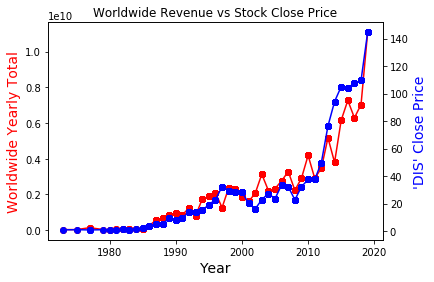

In [11]:
#Create chart that compares the worldwide revenue vs stock price
fig,ax = plt.subplots()

ax.plot(data["Year"],data["Worldwide Yearly Total"], color="red", marker="o")
ax.set_xlabel("Year", fontsize=14)
ax.set_ylabel("Worldwide Yearly Total", color="red", fontsize=14)
ax.set_title("Worldwide Revenue vs Stock Close Price")

ax2=ax.twinx()

ax2.plot(data["Year"], data["Close"],color="blue",marker="o")
ax2.set_ylabel("'DIS' Close Price",color="blue",fontsize=14)
plt.rcParams["figure.figsize"] = [20, 10]

plt.show()

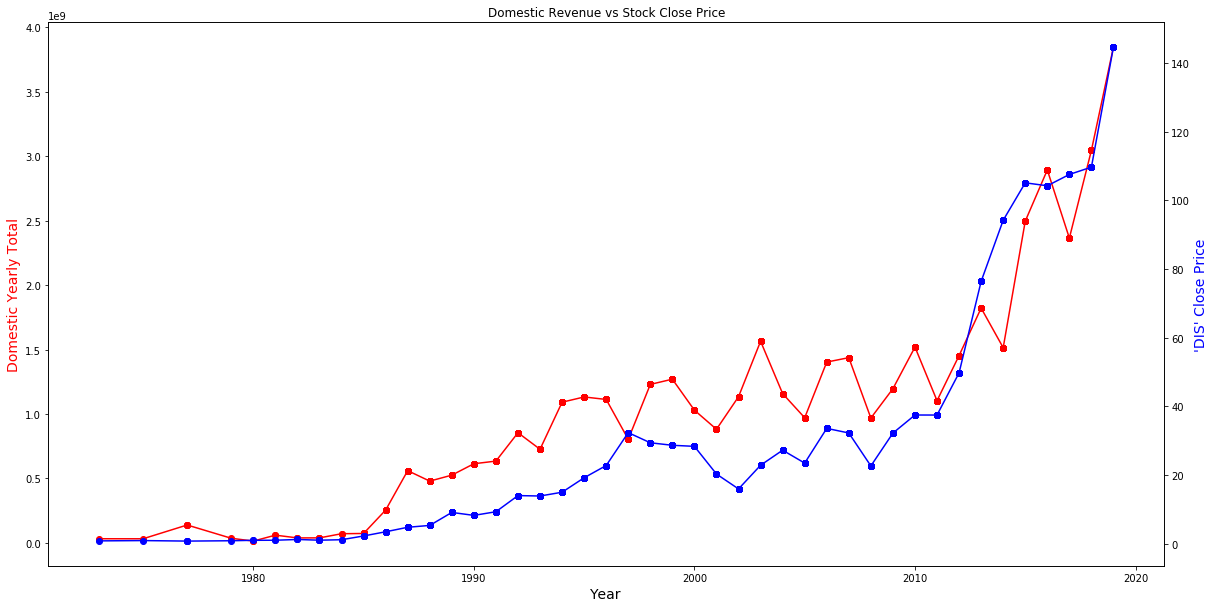

In [12]:
#Create chart that compares the domestic revenue vs stock price
fig,ax = plt.subplots()

ax.plot(data["Year"],data["Domestic Yearly Total"], color="red", marker="o")
ax.set_xlabel("Year", fontsize=14)
ax.set_ylabel("Domestic Yearly Total", color="red", fontsize=14)
ax.set_title("Domestic Revenue vs Stock Close Price")

ax2=ax.twinx()

ax2.plot(data["Year"], data["Close"],color="blue",marker="o")
ax2.set_ylabel("'DIS' Close Price",color="blue",fontsize=14)
plt.rcParams["figure.figsize"] = [20, 10]

plt.show()

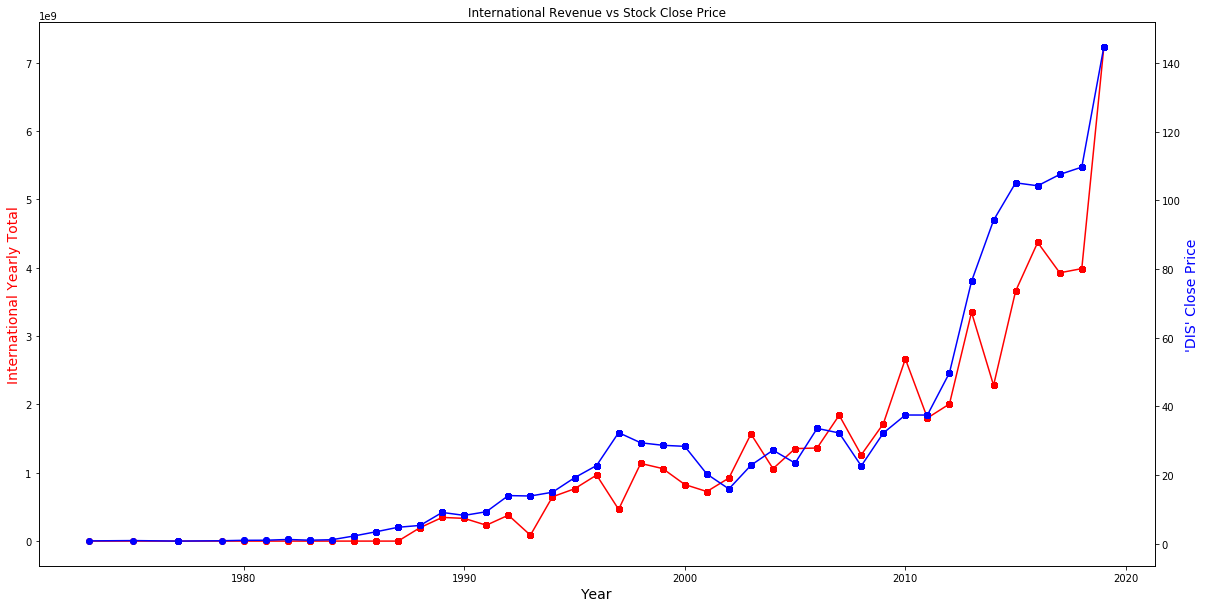

In [13]:
#Create chart that compares the international revenue vs stock price
fig,ax = plt.subplots()

ax.plot(data["Year"],data["International Yearly Total"], color="red", marker="o")
ax.set_xlabel("Year", fontsize=14)
ax.set_ylabel("International Yearly Total", color="red", fontsize=14)
ax.set_title("International Revenue vs Stock Close Price")

ax2=ax.twinx()

ax2.plot(data["Year"], data["Close"],color="blue",marker="o")
ax2.set_ylabel("'DIS' Close Price",color="blue",fontsize=14)
plt.rcParams["figure.figsize"] = [20, 10]

plt.show()

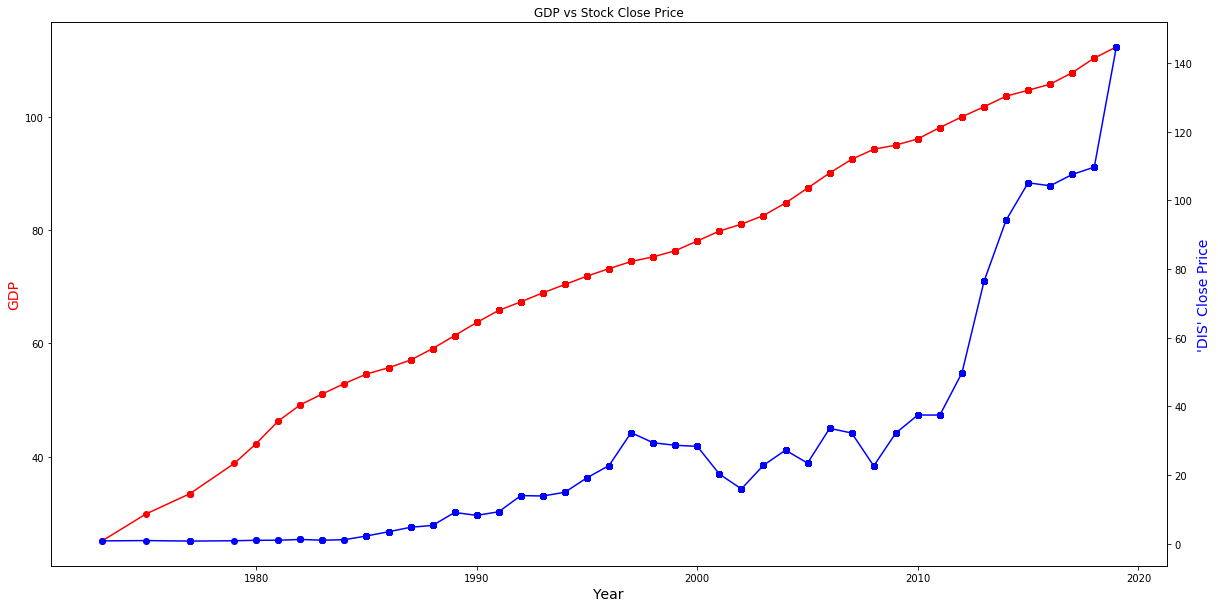

In [14]:
#Create chart that compares the US GDP vs stock price
fig,ax = plt.subplots()

ax.plot(data["Year"],data["GDP"], color="red", marker="o")
ax.set_xlabel("Year", fontsize=14)
ax.set_ylabel("GDP", color="red", fontsize=14)
ax.set_title("GDP vs Stock Close Price")

ax2=ax.twinx()

ax2.plot(data["Year"], data["Close"],color="blue",marker="o")
ax2.set_ylabel("'DIS' Close Price",color="blue",fontsize=14)
plt.rcParams["figure.figsize"] = [20, 10]

plt.show()

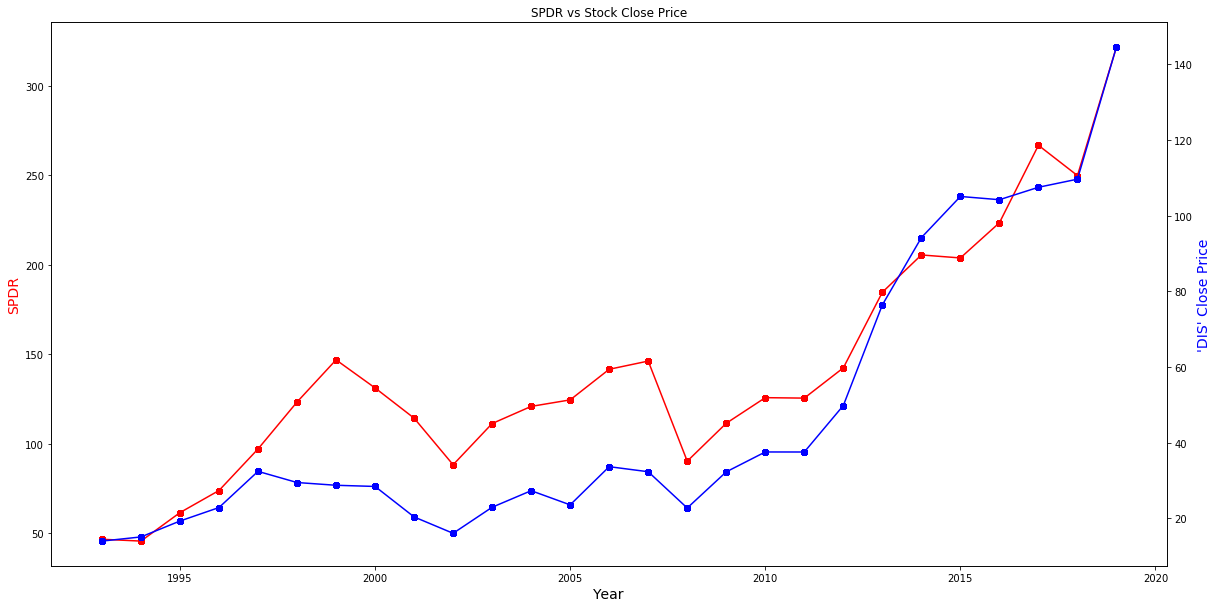

In [15]:
#Create chart that compares the SPY index close price vs Disney close price
fig,ax = plt.subplots()

ax.plot(recent_data["Year"],recent_data["SPDR"], color="red", marker="o")
ax.set_xlabel("Year", fontsize=14)
ax.set_ylabel("SPDR", color="red", fontsize=14)
ax.set_title("SPDR vs Stock Close Price")

ax2=ax.twinx()

ax2.plot(recent_data["Year"], recent_data["Close"],color="blue",marker="o")
ax2.set_ylabel("'DIS' Close Price",color="blue",fontsize=14)
plt.rcParams["figure.figsize"] = [20, 10]

plt.show()

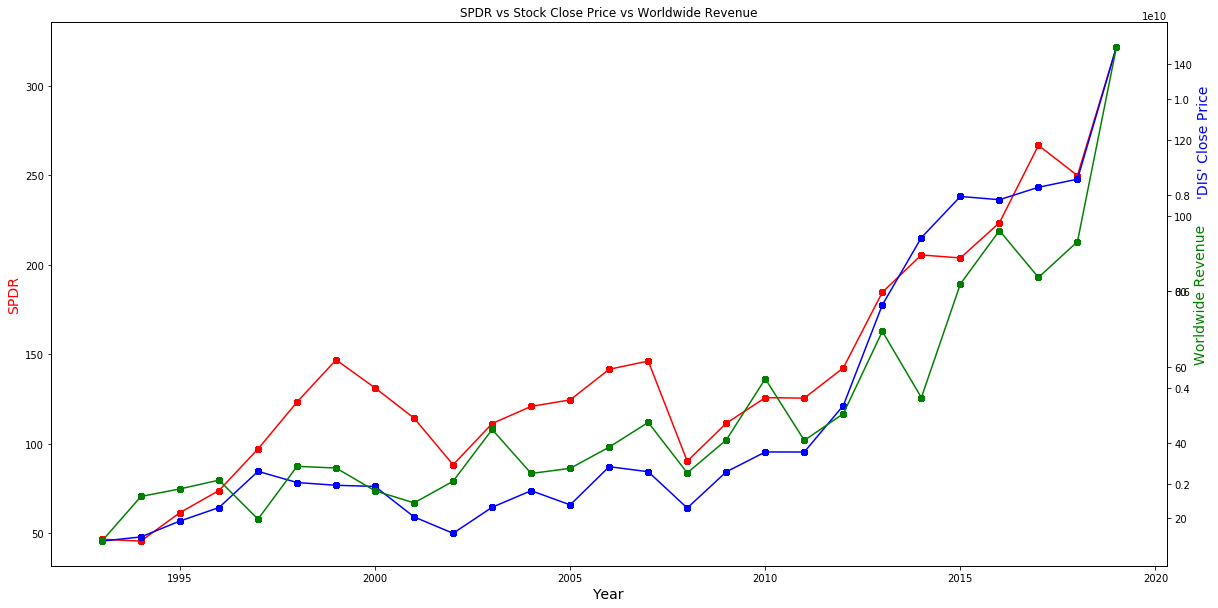

In [16]:
#Create chart that compares the worldwide revenue vs stock price vs SPY Index price
fig,ax = plt.subplots()

ax.plot(recent_data["Year"],recent_data["SPDR"], color="red", marker="o")
ax.set_xlabel("Year", fontsize=14)
ax.set_ylabel("SPDR", color="red", fontsize=14)
ax.set_title("SPDR vs Stock Close Price vs Worldwide Revenue")

ax2=ax.twinx()

ax2.plot(recent_data["Year"], recent_data["Close"],color="blue",marker="o")
ax2.set_ylabel("                                                                    'DIS' Close Price",color="blue",fontsize=14)
plt.rcParams["figure.figsize"] = [20, 10]

ax3=ax.twinx()

ax3.plot(recent_data["Year"], recent_data["Worldwide Yearly Total"],color="green",marker="o")
ax3.set_ylabel("Worldwide Revenue",color="green",fontsize=14)


plt.show()


In [17]:
# Conclusions:
# - It is clear that there is a correllation between Box Office revenue and stock price at both the International and Domestive level.
# - When comparing Disney with growth in the US economy (GDP), there is not a strong correllatition. This is likely to be due to the impact of corporate actions (e.g. dividends, stock splits etc) which impact stock prices
# - When comparing Disney against the S&P 500 Index, a strong correlation can be seen, indicating that movement in the Disney Stock may be more indicative of overall investor confidence in the US Equity market
# - There are some clear indications of market crashes which impacted revenue as consumers focuse spending on necessity goods (not movies). See 2000->2002 for the DotCom crash and 2008->2009 for the Global Financial Crisis
# - 1997-1999 is an interesting period where the US stock market was performing strongly, movie revenue was up, but Disney stock was unexpectedly down. This could relate to reduced revenue in other business streams.
#
#
#